## About project

we are going to predict the CO2 Emission for a car vechicle based on given car parameters. 


Steps:
1. Data Preparation & Feature Selection 
    - Check all the features in the dataset. 
    - Select only Numeric Feature for this project and Avoid the Categorical attributes. 
    - select highly correlated features. 
    - Select most important two features which are highly correlated with the dependent variable.  
    - Create Standard Scaler Features. 
2. Train-test Split 
    - Divide your data into tain and Test Split.  

3. Model Train

4. Model Plot

## Import libararies

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model

## Read data 

In [83]:
fuel_consumption = pd.read_csv('FuelConsumptionCo2.csv')
fuel_consumption.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Get only numeric features

In [84]:
numeric_features = fuel_consumption._get_numeric_data()
numeric_features.head()

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,2.0,4,9.9,6.7,8.5,33,196
1,1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2,2014,1.5,4,6.0,5.8,5.9,48,136
3,3,2014,3.5,6,12.7,9.1,11.1,25,255
4,4,2014,3.5,6,12.1,8.7,10.6,27,244


## get Correlatinship and select only two features you need

In [85]:
numeric_features.describe().round(2)

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.00,1067.0,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00
mean,533.00,2014.0,3.35,5.79,13.30,9.47,11.58,26.44,256.23
std,308.16,0.0,1.42,1.80,4.10,2.79,3.49,7.47,63.37
min,0.00,2014.0,1.00,3.00,4.60,4.90,4.70,11.00,108.00
25%,266.50,2014.0,2.00,4.00,10.25,7.50,9.00,21.00,207.00
50%,533.00,2014.0,3.40,6.00,12.60,8.80,10.90,26.00,251.00
75%,799.50,2014.0,4.30,8.00,15.55,10.85,13.35,31.00,294.00
max,1066.00,2014.0,8.40,12.00,30.20,20.50,25.80,60.00,488.00


In [86]:
numeric_features.columns[2:] # select all columns except Unnamed and ModelYear

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

- exclude model year, since all values are same, remove the nunamed column.  
- Exclude Unnamed:0 columns 


In [87]:
numeric_features = numeric_features[numeric_features.columns[2:]]

In [88]:
numeric_features.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


- All parameters are highly correlated with CO2EMISSIONS,  Hence all are good candidate. 
- Remove Collinar features 
- Remove Correlated independent features.  
- Selecting only ( ENGINESIZE , FUELCONSUMPTION_COMB_MPG ) rest can be excluded due to above properties defined

In [89]:
numeric_features = numeric_features[['ENGINESIZE','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
numeric_features.head()
# numeric_features

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


## standard Scaler to scale the attributes

In [122]:
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(numeric_features.to_numpy())
X_Std_df = pd.DataFrame(X_std,columns=numeric_features.columns)
X_Std_df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,-0.951292,0.878553,-0.950840
1,-0.668653,0.342734,-0.556161
2,-1.304591,2.887876,-1.898070
3,0.108606,-0.193086,-0.019397
4,0.108606,0.074824,-0.193056


In [123]:
# Get variance, Mean and Std deviation of independent variables. 
variance = std_scaler.var_[0:-1]
mean = std_scaler.mean_[0:-1]
std = np.sqrt(std_scaler.var_[0:-1] )

print("Variance : " , variance )
print("Standard_Devivation : " , std)
print("Mean : " , mean)



Variance :  [ 2.00287992 55.72923059]
Standard_Devivation :  [1.4152314  7.46520131]
Mean :  [ 3.34629803 26.44142455]


## Train and Test Split


In [124]:
X_Std_featurs = X_Std_df[['ENGINESIZE','FUELCONSUMPTION_COMB_MPG']].to_numpy()
X_Std_predict = X_Std_df[['CO2EMISSIONS']].to_numpy()
print(X_Std_featurs[0:5], X_Std_predict[0:5])
X_train, X_test, y_train, y_test = train_test_split(X_Std_featurs,X_Std_predict,test_size=0.20,random_state=42)

[[-0.9512918   0.87855306]
 [-0.66865251  0.34273362]
 [-1.30459092  2.88787597]
 [ 0.10860554 -0.19308583]
 [ 0.10860554  0.0748239 ]] [[-0.95084   ]
 [-0.55616091]
 [-1.89806981]
 [-0.01939735]
 [-0.19305615]]


## Model Fit

In [125]:
X_test[0:5]

array([[ 0.95652341, -0.72890527],
       [ 0.10860554,  0.34273362],
       [ 0.17926536, -0.59495041],
       [-0.24469358,  0.34273362],
       [-0.9512918 ,  0.61064334]])

In [126]:
# Fit Model
ml_regressor = linear_model.LinearRegression()
ml_regressor.fit(X_train,y_train)

# Get prdedicted value using the model on the test data.


LinearRegression()

In [135]:
y_predict = ml_regressor.predict(X_test)

In [137]:
y_predict[0:5]

array([[ 0.81344156],
       [-0.15825739],
       [ 0.42414633],
       [-0.29922205],
       [-0.73949732]])

## Model Parameters

In [129]:
print("Coef {} Intercept {}".format(ml_regressor.coef_, ml_regressor.intercept_))
std

Coef [[ 0.39899524 -0.59104215]] Intercept [0.00097954]


array([1.4152314 , 7.46520131])

In [130]:
coef_rescaled =  ml_regressor.coef_/std
intercept_rescaled = ml_regressor.intercept_ - np.sum(mean*ml_regressor.coef_)/std

## Model Ploting

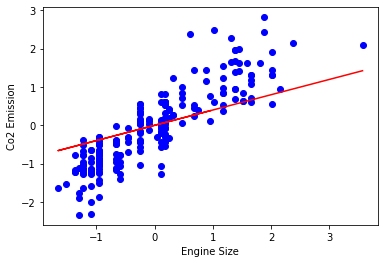

In [132]:
plt.scatter(X_test[:,0], y_test,color='blue')
plt.plot(X_test[:0],ml_regressor.coef_[0,0] * X_test[:0] + ml_regressor.intercept_ ,'-r')
plt.plot(X_test[:,0], ml_regressor.coef_[0,0] * X_test[:,0] + ml_regressor.intercept_, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

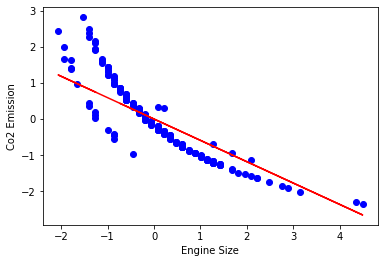

In [134]:
plt.scatter(X_test[:,1], y_test,color='blue')
plt.plot(X_test[:,1], ml_regressor.coef_[0,1] * X_test[:,1] + ml_regressor.intercept_, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()